In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [33]:
import os
file_path = "C:\\Users\\manik\\OneDrive\\Desktop\\Github\\MusicGenreClassification\\Data"
for dirname, _, filenames in os.walk(file_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\features_30_sec.csv
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\features_3_sec.csv
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00000.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00001.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00002.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00003.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00004.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00005.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues\blues.00006.wav
C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genre

[-0.02459717 -0.04446411 -0.04428101 -0.05108643 -0.05322266]
22050


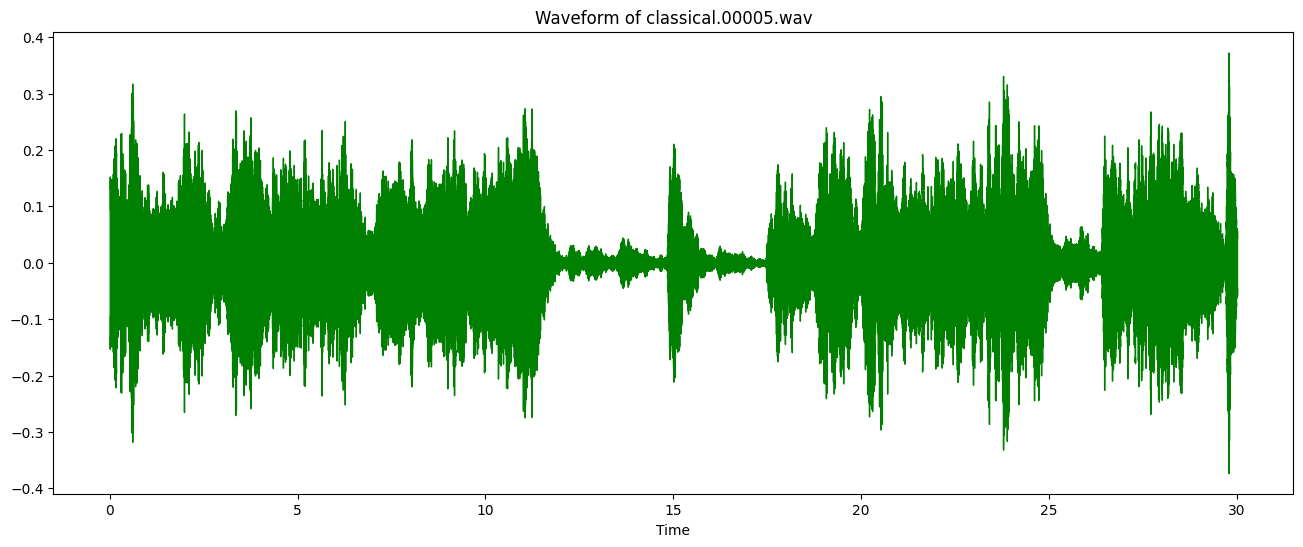

In [35]:
import matplotlib.pyplot as plt
import librosa.display
sound, sample_rate = librosa.load(r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\classical\classical.00005.wav')
print(sound[:5])
print(sample_rate)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=sample_rate, color='green') 
plt.title('Waveform of classical.00005.wav', fontsize=12)
plt.show()

[-0.01455688 -0.06048584 -0.02310181  0.02371216 -0.03018188]
22050


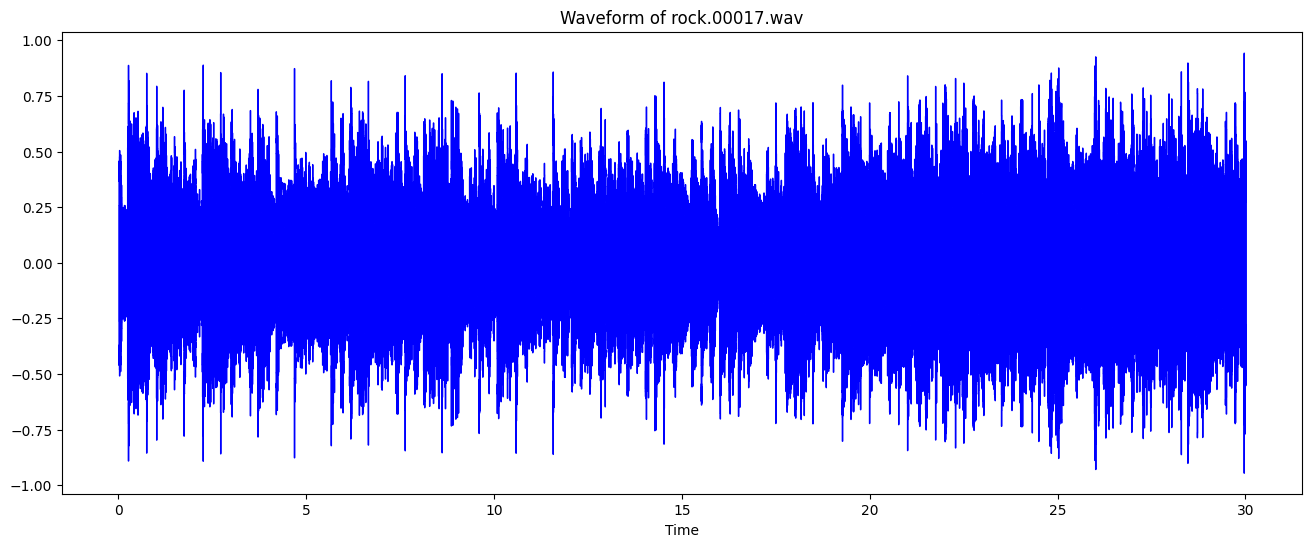

In [34]:
sound_rock, sample_rate_rock = librosa.load(r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\rock\rock.00017.wav')
print(sound_rock[:5])
print(sample_rate_rock)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound_rock, sr=sample_rate_rock, color='blue')
plt.title('Waveform of rock.00017.wav', fontsize=12)
plt.show()

In [13]:
n_fft = 2048 
hop_length = 512 
D = np.abs(librosa.stft(sound_rock, n_fft = n_fft, hop_length = hop_length))
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


In [15]:
pd.set_option('display.max_columns', 60)
df = pd.read_csv(r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\features_30_sec.csv')
df.head()
print(df.shape)
print(df.info())

(1000, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


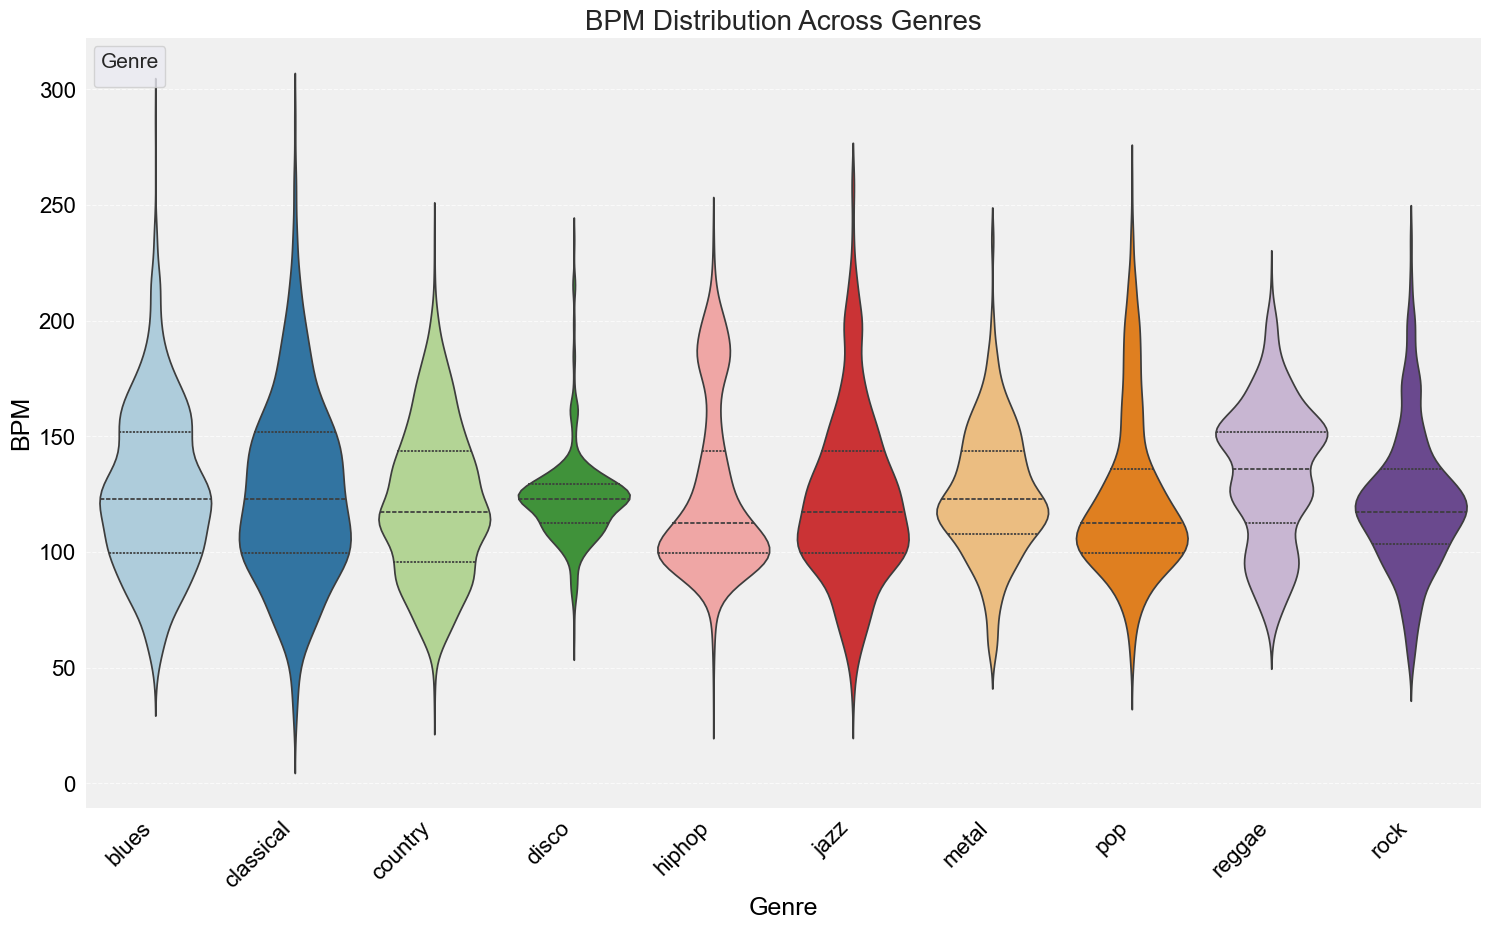

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
label_tempo_df = df[['label', 'tempo']]
colors = sns.color_palette('Paired')
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 10))
sns.violinplot(x='label', y='tempo', data=label_tempo_df, palette=colors, inner='quartile')
plt.title('BPM Distribution Across Genres', fontsize=20)
plt.xticks(fontsize=16, rotation=45, ha='right', color='black')  
plt.yticks(fontsize=16, color='black')
plt.xlabel('Genre', fontsize=18, color='black')
plt.ylabel('BPM', fontsize=18, color='black')
ax.set_facecolor('#F0F0F0')  
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Genre', title_fontsize='15', fontsize='12', loc='upper left')
sns.despine(left=True, bottom=True)
plt.show()

In [17]:
from sklearn import preprocessing

data = df.iloc[0:, 1:]
y = data['label']
X = data.drop('label', axis = 1)

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)
print('variance ratio : ', pca.explained_variance_ratio_)
print('sum : ', sum(pca.explained_variance_ratio_))

variance ratio :  [0.2439355  0.21781804]
sum :  0.46175354105629607


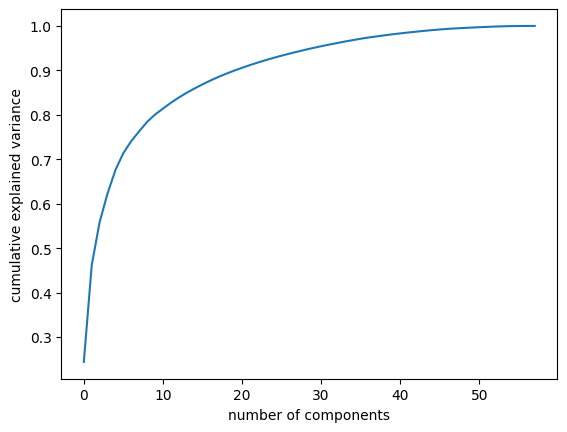

In [18]:
pca = PCA(whiten = True).fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE

In [21]:
data = pd.read_csv(r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [22]:
df = data.iloc[0:, 2:]
y = df.label.values
X = df.drop('label', axis = 1)
X_columns = X.columns
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X_columns).values

In [23]:
def model_build(model, kf, title = "Default"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    print("Accuracy score of", title, "is:", round(np.mean(accuracy_scores), 2))
    con_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(con_mat, cmap="Blues", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", 
                               "hiphop", "jazz", "metal", "pop", "reggae", "rock"], 
                yticklabels=["blues", "classical", "country", "disco", "hiphop", 
                             "jazz", "metal", "pop", "reggae", "rock"])
    plt.show()

In [24]:
split = KFold(n_splits=5, shuffle=True)

Accuracy score of Random Forest Classifier is: 0.81


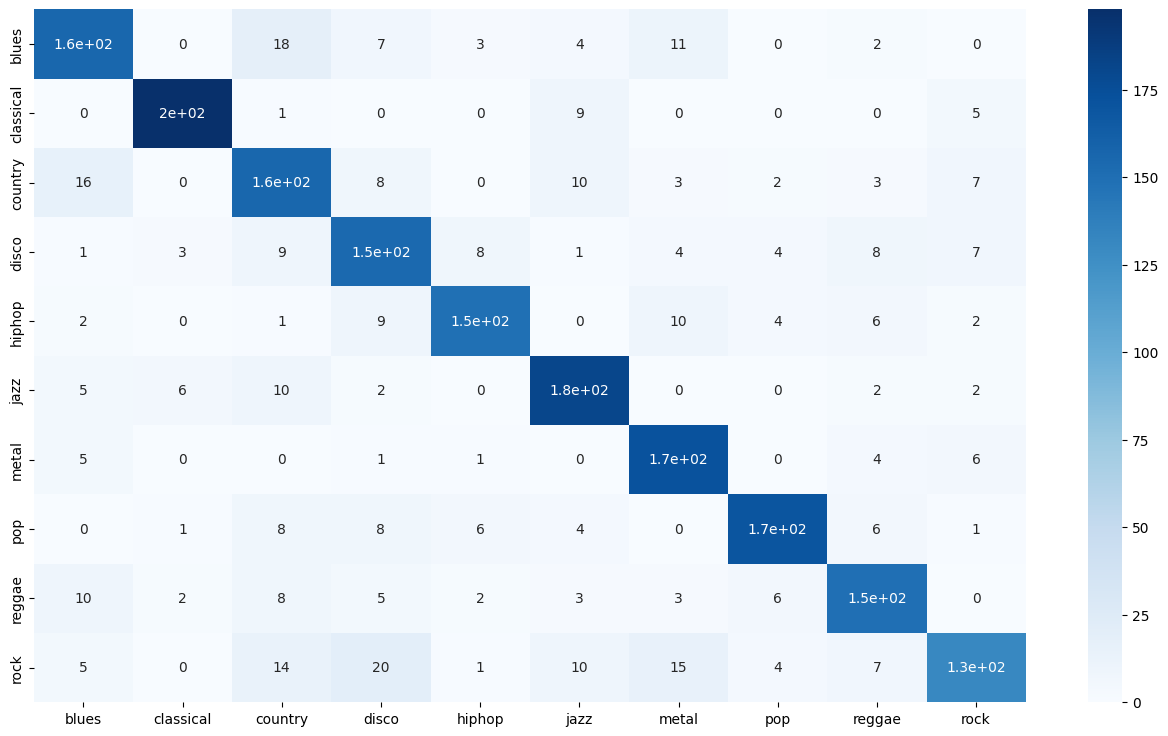

In [25]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10)
model_build(rfc, split, 'Random Forest Classifier')

Accuracy score of K Nearest Neighbor is: 0.87


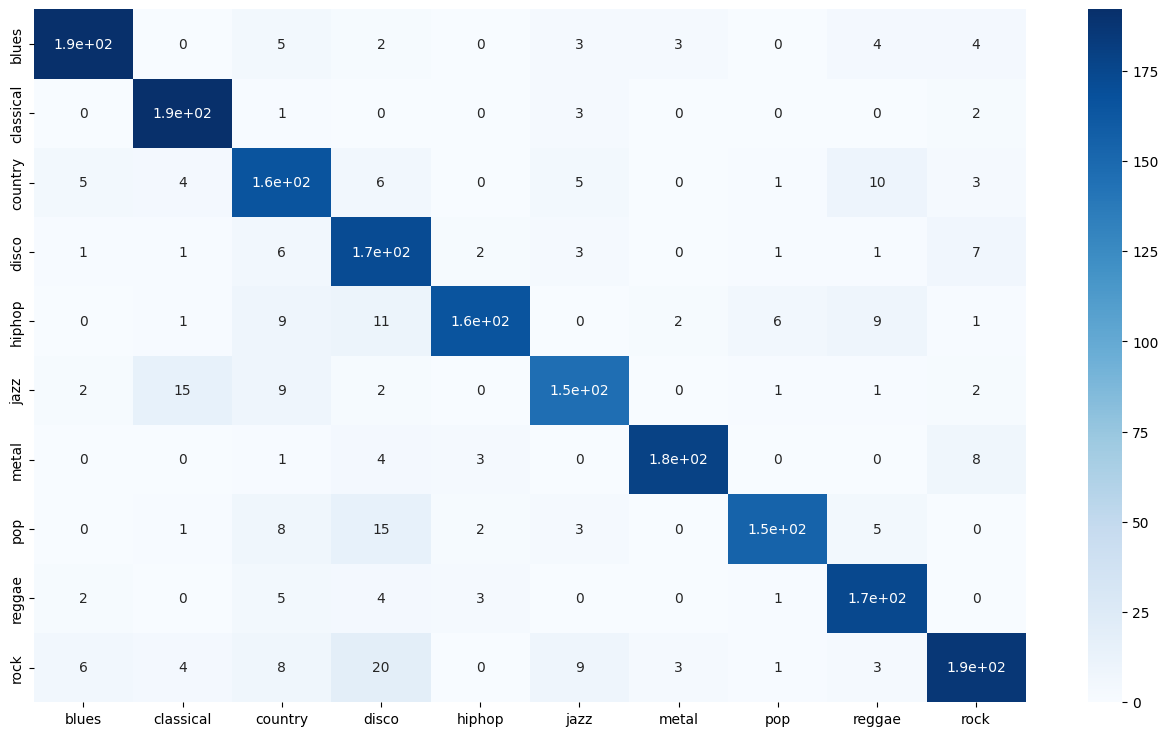

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
model_build(knn, split, 'K Nearest Neighbor')

Accuracy score of Support Vector Machine is: 0.75


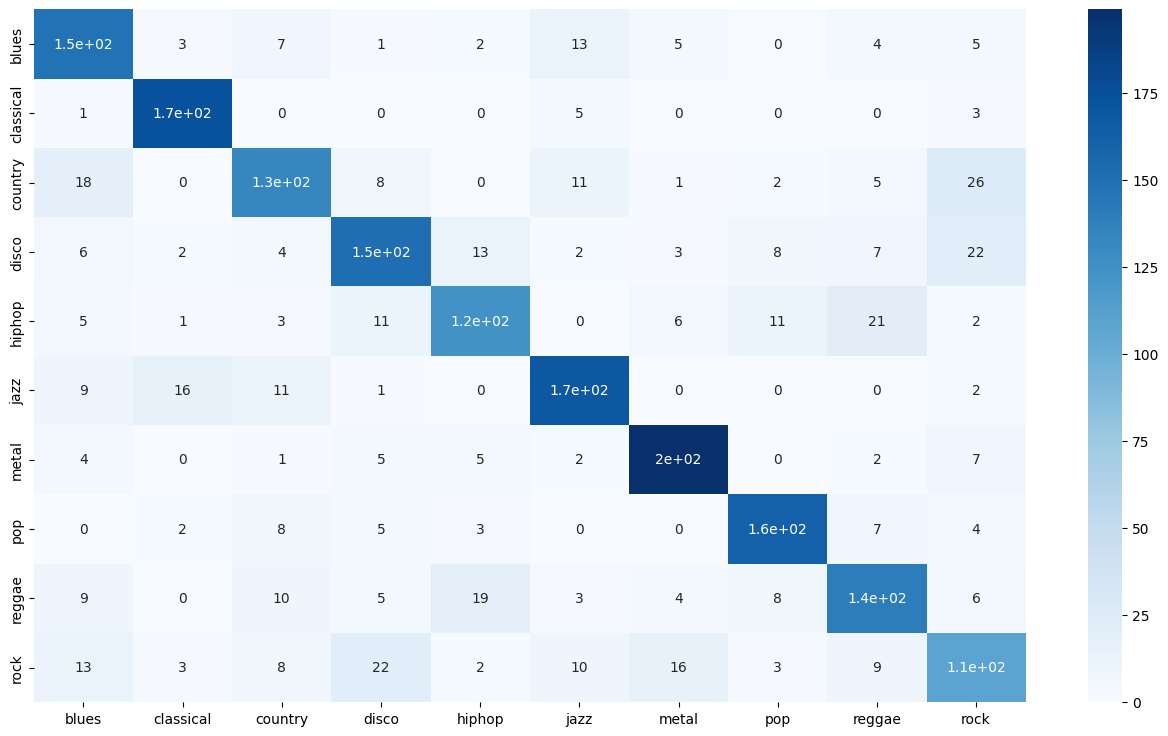

In [27]:
svm = SVC(decision_function_shape="ovo")
model_build(svm, split, 'Support Vector Machine')

In [29]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
data = pd.read_csv(r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\features_30_sec.csv', index_col='filename')
labels = data[['label']]
data = data.drop(columns=['length', 'label'])
data_scaled = preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index
sim_df_names.head()

Scaled data type: <class 'numpy.ndarray'>
Similarity shape: (1000, 1000)


filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,blues.00010.wav,blues.00011.wav,blues.00012.wav,blues.00013.wav,blues.00014.wav,blues.00015.wav,blues.00016.wav,blues.00017.wav,blues.00018.wav,blues.00019.wav,blues.00020.wav,blues.00021.wav,blues.00022.wav,blues.00023.wav,blues.00024.wav,blues.00025.wav,blues.00026.wav,blues.00027.wav,blues.00028.wav,blues.00029.wav,...,rock.00070.wav,rock.00071.wav,rock.00072.wav,rock.00073.wav,rock.00074.wav,rock.00075.wav,rock.00076.wav,rock.00077.wav,rock.00078.wav,rock.00079.wav,rock.00080.wav,rock.00081.wav,rock.00082.wav,rock.00083.wav,rock.00084.wav,rock.00085.wav,rock.00086.wav,rock.00087.wav,rock.00088.wav,rock.00089.wav,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,-0.004725,-0.138701,0.022420,0.170770,-0.100287,-0.061984,0.038424,0.070591,-0.043250,-0.032994,0.506165,-0.103861,-0.153357,-0.021814,-0.068566,-0.103846,-0.286219,-0.017917,0.019182,-0.245793,...,-0.018038,0.616646,0.616184,0.619470,0.737537,0.391488,0.386102,0.524411,0.383944,0.635159,0.483003,0.338310,0.341182,0.704877,0.468150,-0.165756,-0.033461,0.655153,0.271846,0.484170,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,0.187969,0.537564,0.116593,0.138999,0.372891,0.339293,0.243391,0.293110,0.242766,0.350323,0.173128,0.374270,0.433072,0.041210,0.293562,0.208121,0.265333,0.069686,0.193576,0.315657,...,-0.086265,-0.040695,-0.088279,-0.219520,-0.169743,0.043461,0.234076,-0.143892,0.226681,-0.234705,-0.254766,0.087614,-0.204128,-0.241611,-0.207278,0.031050,0.220761,-0.295174,-0.133969,0.047796,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,0.220436,0.057667,0.214217,0.026326,-0.174039,-0.091717,0.042537,0.056512,-0.294934,0.037617,0.287231,-0.181328,-0.235117,0.129427,-0.020690,-0.191341,-0.372636,-0.058686,0.120372,0.075361,...,0.234224,0.450491,0.417995,0.488881,0.503598,0.348458,0.357615,0.455360,0.404612,0.631893,0.443831,0.326861,0.241868,0.550154,0.420591,0.109318,0.109191,0.594156,0.192450,0.566140,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,0.339783,0.414037,0.103369,0.220996,0.224956,0.228406,0.042363,0.261825,0.065738,0.303616,0.225934,0.248292,0.260467,0.101586,0.330638,0.255722,0.167251,0.160013,0.378844,0.163240,...,-0.314229,0.010499,0.061320,-0.050735,0.042413,-0.168371,0.291878,-0.034075,0.213593,-0.047289,-0.232775,-0.261782,-0.300883,-0.029997,-0.253542,-0.343440,-0.280107,-0.113291,-0.274467,0.285601,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,0.425722,0.440986,0.375045,0.112140,-0.042368,0.160624,0.103306,0.137831,-0.088361,0.321315,0.019133,-0.042296,0.035282,0.138877,0.058387,-0.062569,-0.134307,0.079337,0.127336,0.419068,...,0.481840,-0.236271,-0.207946,-0.151639,-0.163956,-0.018372,0.075316,-0.122199,0.065956,0.126620,0.057758,0.171239,-0.041117,-0.007086,-0.006466,0.477521,0.256614,-0.076402,0.105612,0.368627,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785


In [31]:
def recommender(name):
    series = sim_df_names[name].sort_values(ascending=False)
    series = series.drop(name)
    topfive = series.head(5)
    songnames = topfive.index.tolist()
    address_list = [
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\blues',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\classical',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\country',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\disco',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\hiphop',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\jazz',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\metal',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\pop',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\reggae',
        r'C:\Users\manik\OneDrive\Desktop\Github\MusicGenreClassification\Data\genres_original\rock'
    ]
    genre_list = ["blues", "classical", "country", "disco", 
                  "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
    songlist = []
    songnames = []
    for songname in topfive.index:
        songgenre = songname.split('.')[0]
        address = genre_list.index(songgenre)
        fileaddress = address_list[address] + ('/') + songname
        songlist.append(fileaddress)
        songnames.append(songname)
    return songlist, songnames

In [32]:
now_playing = 'hiphop.00010.wav'
playlist, songname = recommender(now_playing)
print('Recommended songs:\n\n', pd.Series(songname))
ipd.Audio(playlist[0])

Recommended songs:

 0     hiphop.00017.wav
1     hiphop.00023.wav
2      blues.00077.wav
3    country.00075.wav
4      blues.00078.wav
dtype: object
